# German Housing Prices vs GDP (1965–2024)

#### Goal: Explore how GDP trends relate to housing price changes in Germany (GREIX dataset)

### Load Data

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# Load GDP dataset 
gdp_raw = pd.read_csv("Data/GDP 1960-2024.csv", skiprows=4)

# Display structure
print("Dataset shape:", gdp_raw.shape)
gdp_raw.head(3)


Dataset shape: (266, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.420993e+10,2.496326e+10,2.707802e+10,3.177483e+10,3.028492e+10,3.381219e+10,...,8.289612e+11,9.730251e+11,1.012291e+12,1.009747e+12,9.334072e+11,1.085605e+12,1.191639e+12,1.133818e+12,1.205974e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN,NaN


### Data Cleaning and Preprocessing

In [11]:
# Filter for Germany only
gdp_germany = gdp_raw[gdp_raw["Country Name"] == "Germany"].copy()

# Drop unnecessary columns
gdp_germany = gdp_germany.drop(
    columns=["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
)

# Transpose years to rows
gdp_germany = gdp_germany.melt(var_name="Year", value_name="GDP (US$)")

# Convert to numeric types
gdp_germany["Year"] = pd.to_numeric(gdp_germany["Year"], errors="coerce")
gdp_germany["GDP (US$)"] = pd.to_numeric(gdp_germany["GDP (US$)"], errors="coerce")

# Filter for relevant years (1990–2024)
gdp_germany = gdp_germany[(gdp_germany["Year"] >= 1965) & (gdp_germany["Year"] <= 2024)]

print("Cleaned GDP data:")
display(gdp_germany.head())


Cleaned GDP data:


,Year,GDP (US$)
5,1965.0,1.347747e+11
6,1966.0,1.433043e+11
7,1967.0,1.451007e+11
8,1968.0,1.565273e+11
9,1969.0,1.777335e+11


### Focus only on the national average (GREIX)

In [10]:
# Load GREIX housing data
greix = pd.read_excel("Data/GREIX_all_cities_data.xlsx")

# Keep only national average
greix_national = greix[greix["City"] == "GREIX"].copy()

# Group by year and calculate average price
yearly_prices = greix_national.groupby("Year", as_index=False)["Price"].mean()
yearly_prices.rename(columns={"Price": "Average_Price (€)"}, inplace=True)

print("GREIX yearly housing price data:")
display(yearly_prices.head())


GREIX yearly housing price data:


,Year,Average_Price (€)
0,1965,650.000000
1,1966,666.666667
2,1967,716.666667
3,1968,733.333333
4,1969,750.000000


### Merge GDP and Housing Price Data

In [12]:
# Merge by year
merged_gdp = pd.merge(
    yearly_prices,
    gdp_germany,
    on="Year",
    how="inner"
)

print("Merged dataset preview:")
display(merged_gdp.head())


Merged dataset preview:


,Year,Average_Price (€),GDP (US$)
0,1965,650.000000,1.347747e+11
1,1966,666.666667,1.433043e+11
2,1967,716.666667,1.451007e+11
3,1968,733.333333,1.565273e+11
4,1969,750.000000,1.777335e+11


### Housing prices vs GDP

Exploring how overall economic growth aligns with long-term changes in property values

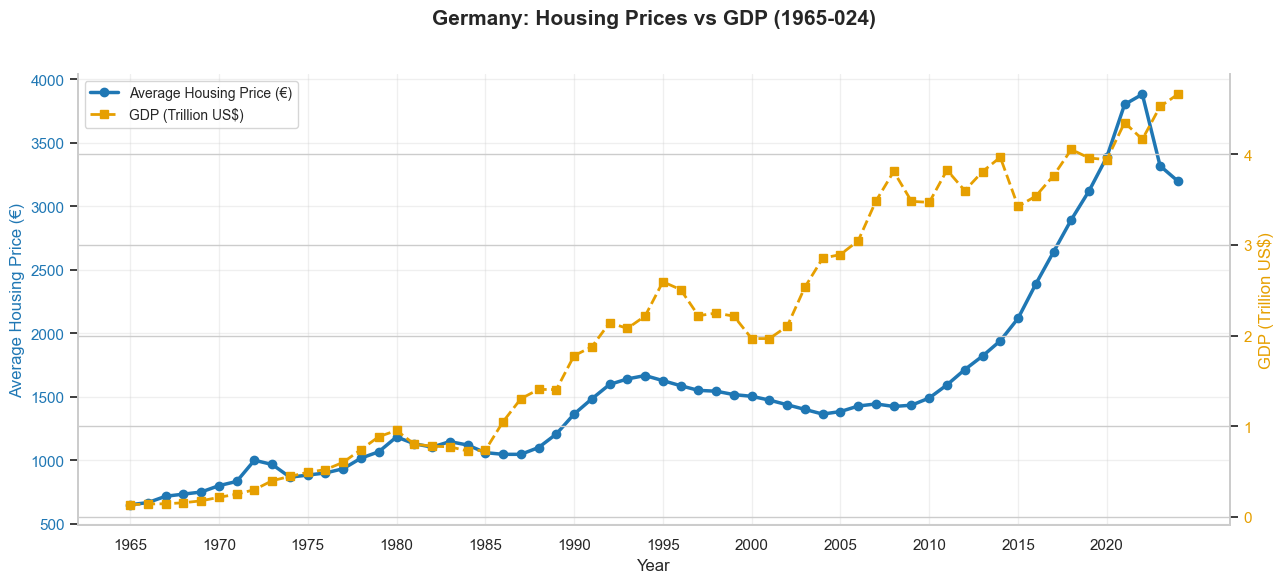

In [ ]:
# Apply consistent visual theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(13, 6))

# Housing Prices
line1, = ax1.plot(
    merged_gdp["Year"],
    merged_gdp["Average_Price (€)"],
    color="#1f77b4",
    marker="o",
    linewidth=2.5,
    label="Average Housing Price (€)"
)

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Average Housing Price (€)", color="#1f77b4", fontsize=12)
ax1.tick_params(axis="y", labelcolor="#1f77b4")

# GDP 
ax2 = ax1.twinx()
line2, = ax2.plot(
    merged_gdp["Year"],
    merged_gdp["GDP (US$)"]/1e12, 
    color="#E69F00",
    marker="s",
    linestyle="--",
    linewidth=2,
    label="GDP (Trillion US$)"
)

ax2.set_ylabel("GDP (Trillion US$)", color="#E69F00", fontsize=12)
ax2.tick_params(axis="y", labelcolor="#E69F00")

# Title and Subtitle
plt.title(
    "Germany: Housing Prices vs GDP (1965-024)\n",
    fontsize=15, fontweight="bold", pad=20
)

# Combine Legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper left", frameon=True, facecolor="white", fontsize=10)

# Axis & Grid Styling
ax1.grid(alpha=0.3)
sns.despine(right=False, left=False)

# X-axis tick spacing 
tick_years = range(int(merged_gdp["Year"].min()), int(merged_gdp["Year"].max()) + 1, 5)
ax1.set_xticks(tick_years)
plt.xticks(rotation=45, fontsize=10)

# Layout
plt.tight_layout()
plt.show()


As Germany’s GDP rises over the decades, housing prices tend to follow a similar upward trajectory.
This positive trend suggests that broader economic expansion, reflected in growing GDP has likely increased disposable income, investment capacity, and demand in the real estate sector.

### Correlation and Summary Statistics

In [22]:
# Correlation & Summary Statistics
corr_value = merged_gdp["Average_Price (€)"].corr(merged_gdp["GDP (US$)"])
summary_stats = merged_gdp[["Average_Price (€)", "GDP (US$)"]].describe()

print(f"Correlation between housing prices and GDP: {corr_value:.2f}\n")
print("Summary statistics:")
display(summary_stats)

Correlation between housing prices and GDP: 0.83

Summary statistics:


,Average_Price (€),GDP (US$)
count,60.000000,6.000000e+01
mean,1551.333333,2.076576e+12
std,782.594362,1.429191e+12
min,650.000000,1.347747e+11
25%,1046.666667,7.411918e+11
50%,1425.000000,2.090653e+12
75%,1630.000000,3.480865e+12
max,3880.000000,4.659929e+12


A strong positive correlation (typically > 0.8) would indicate that GDP and housing prices move closely together.

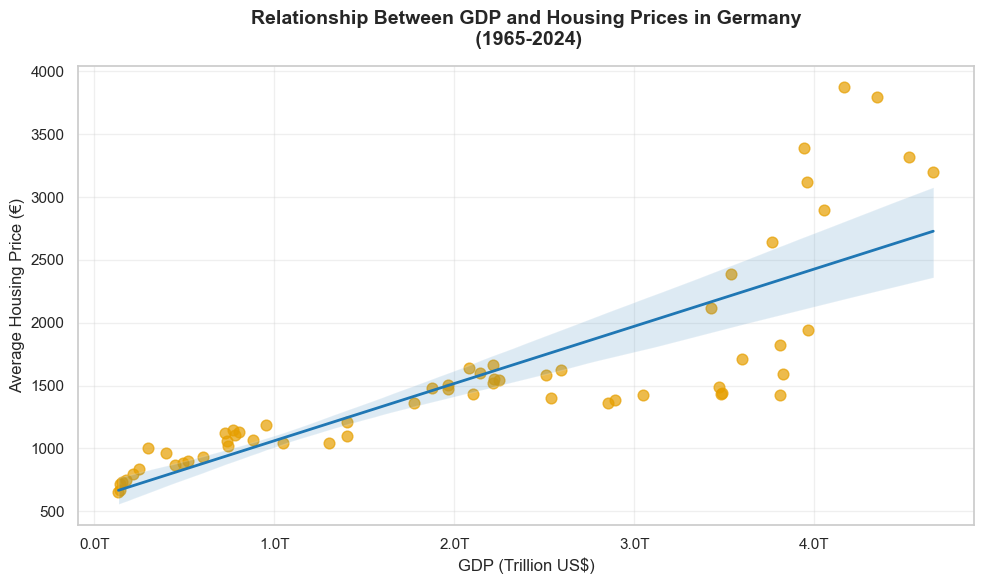

In [ ]:
# Visualization style
sns.set_theme(style="whitegrid")

# Create figure
plt.figure(figsize=(10,6))

# Regression plot
sns.regplot(
    data=merged_gdp,
    x="GDP (US$)",
    y="Average_Price (€)",
    scatter_kws={"s":60, "alpha":0.7, "color":"#E69F00"},
    line_kws={"color":"#1f77b4", "lw":2}
)

# Format GDP axis in trillions
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e12:.1f}T"))

# Titles and labels
plt.title("Relationship Between GDP and Housing Prices in Germany\n (1965-2024)",
          fontsize=14, fontweight="bold", pad=15)
plt.xlabel("GDP (Trillion US$)", fontsize=12)
plt.ylabel("Average Housing Price (€)", fontsize=12)

# Styling
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


As Germany’s economy expanded from under 1 trillion USD in the 1960s to over 4 trillion USD today, housing prices rose in tandem. The data shows a clear positive relationship, when the economy grows, people earn more, invest more, and housing demand strengthens. In essence, Germany’s economic growth has been a key driver of rising home values over the decades.